# Examining the Sentiment Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

## Get Data

In [2]:
df = pd.read_pickle('data/sentiment_df.pickle')

In [3]:
df.publish_date = pd.to_datetime(df.publish_date, utc=True)

## Distribution of the Sentiment Scores

Text(0.5, 1.0, 'Full Article Sentiment Negative Score')

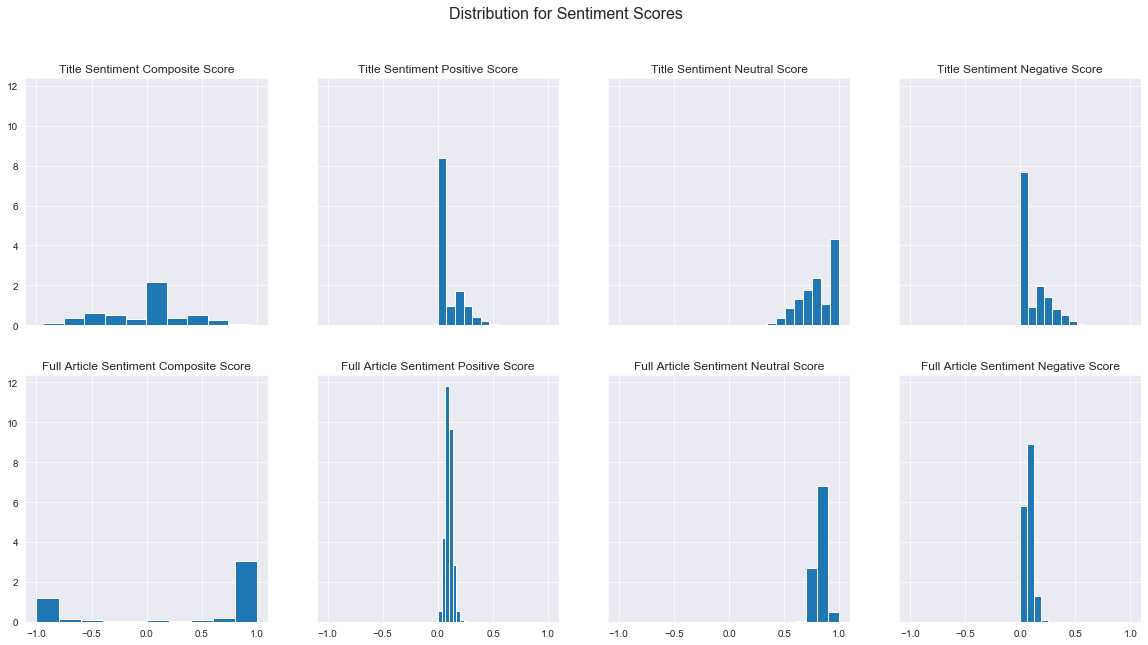

In [19]:
# Create subplots
fig, axes = plt.subplots(
    nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,10)
)

fig.suptitle('Distribution for Sentiment Scores', fontsize=16)

#Plot the histograms
axes[0, 0].hist(df['title_sentiment_comp'], density=True)
axes[0, 0].set_title('Title Sentiment Composite Score')
axes[0, 1].hist(df['title_sentiment_pos'], density=True)
axes[0, 1].set_title('Title Sentiment Positive Score')
axes[0, 2].hist(df['title_sentiment_neu'], density=True)
axes[0, 2].set_title('Title Sentiment Neutral Score')
axes[0, 3].hist(df['title_sentiment_neg'], density=True)
axes[0, 3].set_title('Title Sentiment Negative Score')
axes[1, 0].hist(df['full_sentiment_comp'], density=True)
axes[1, 0].set_title('Full Article Sentiment Composite Score')
axes[1, 1].hist(df['full_sentiment_pos'], density=True)
axes[1, 1].set_title('Full Article Sentiment Positive Score')
axes[1, 2].hist(df['full_sentiment_neu'], density=True)
axes[1, 2].set_title('Full Article Sentiment Neutral Score')
axes[1, 3].hist(df['full_sentiment_neg'], density=True)
axes[1, 3].set_title('Full Article Sentiment Negative Score')

### Observations

From the above chart, the first thing I can notice is that there are great alot of zeros scores for the following sentiment score:
* Title Sentiment Positive Score
* Title Sentiment Negative Score
* Full Article Sentiment Negative Score


The sentiment scores for the title composite score seems to be clustered around the center while the for the full article it seems to be on the extremes

### Investigate the zeros

From examining the mean of the other sentiment measures, it looks like the zeros tend to happen when the articles have are neutral sentiment score when compared to mean neutral sentiment score of all articles

In [5]:
df[df.title_sentiment_pos==0].mean()

title_sentiment_pos     0.000000
title_sentiment_neu     0.879728
title_sentiment_neg     0.120272
title_sentiment_comp   -0.204641
full_sentiment_pos      0.093331
full_sentiment_neu      0.828705
full_sentiment_neg      0.076909
full_sentiment_comp     0.301759
dtype: float64

In [6]:
df[df.title_sentiment_neg==0].mean()

title_sentiment_pos     0.094162
title_sentiment_neu     0.905838
title_sentiment_neg     0.000000
title_sentiment_comp    0.163728
full_sentiment_pos      0.100569
full_sentiment_neu      0.828898
full_sentiment_neg      0.069408
full_sentiment_comp     0.505189
dtype: float64

In [7]:
df[df.full_sentiment_neg==0].mean()

title_sentiment_pos     0.066464
title_sentiment_neu     0.876506
title_sentiment_neg     0.057036
title_sentiment_comp    0.015901
full_sentiment_pos      0.039435
full_sentiment_neu      0.874256
full_sentiment_neg      0.000000
full_sentiment_comp     0.264293
dtype: float64

In [8]:
df.mean()

title_sentiment_pos     0.079851
title_sentiment_neu     0.812731
title_sentiment_neg     0.107421
title_sentiment_comp   -0.046296
full_sentiment_pos      0.097808
full_sentiment_neu      0.824778
full_sentiment_neg      0.076616
full_sentiment_comp     0.363296
dtype: float64

## How sentiment vaires with time

In [9]:
def plot_sentiment(x, y, freq, ax, start=None, end=None,):
    sns.lineplot(
        x='publish_date', 
        y=f'{x}_sentiment_{y}', 
        data=df.groupby([pd.Grouper(key='publish_date', freq=freq)])[[f'{x}_sentiment_{y}']].mean()[start:end].reset_index(),
        ax=ax
    )

### Title Sentiment

In [10]:
start_date = '2019-01-01'

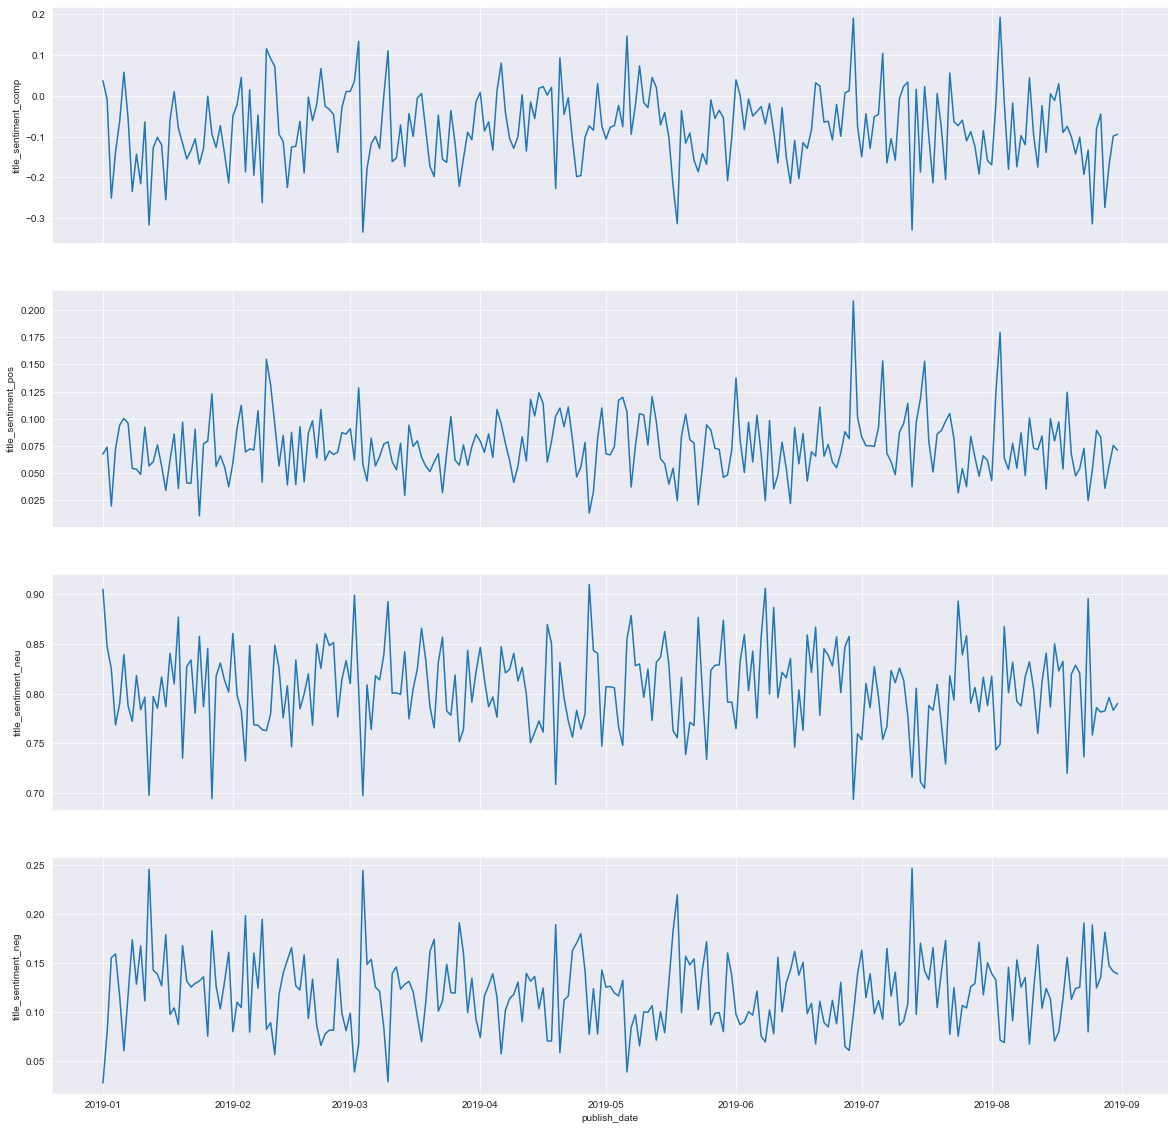

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20,20))
plot_sentiment('title', 'comp', 'D', ax=axes[0], start=start_date )
plot_sentiment('title', 'pos', 'D', ax=axes[1], start=start_date )
plot_sentiment('title', 'neu', 'D', ax=axes[2], start=start_date )
plot_sentiment('title', 'neg', 'D', ax=axes[3], start=start_date )

### Full Article Sentiment

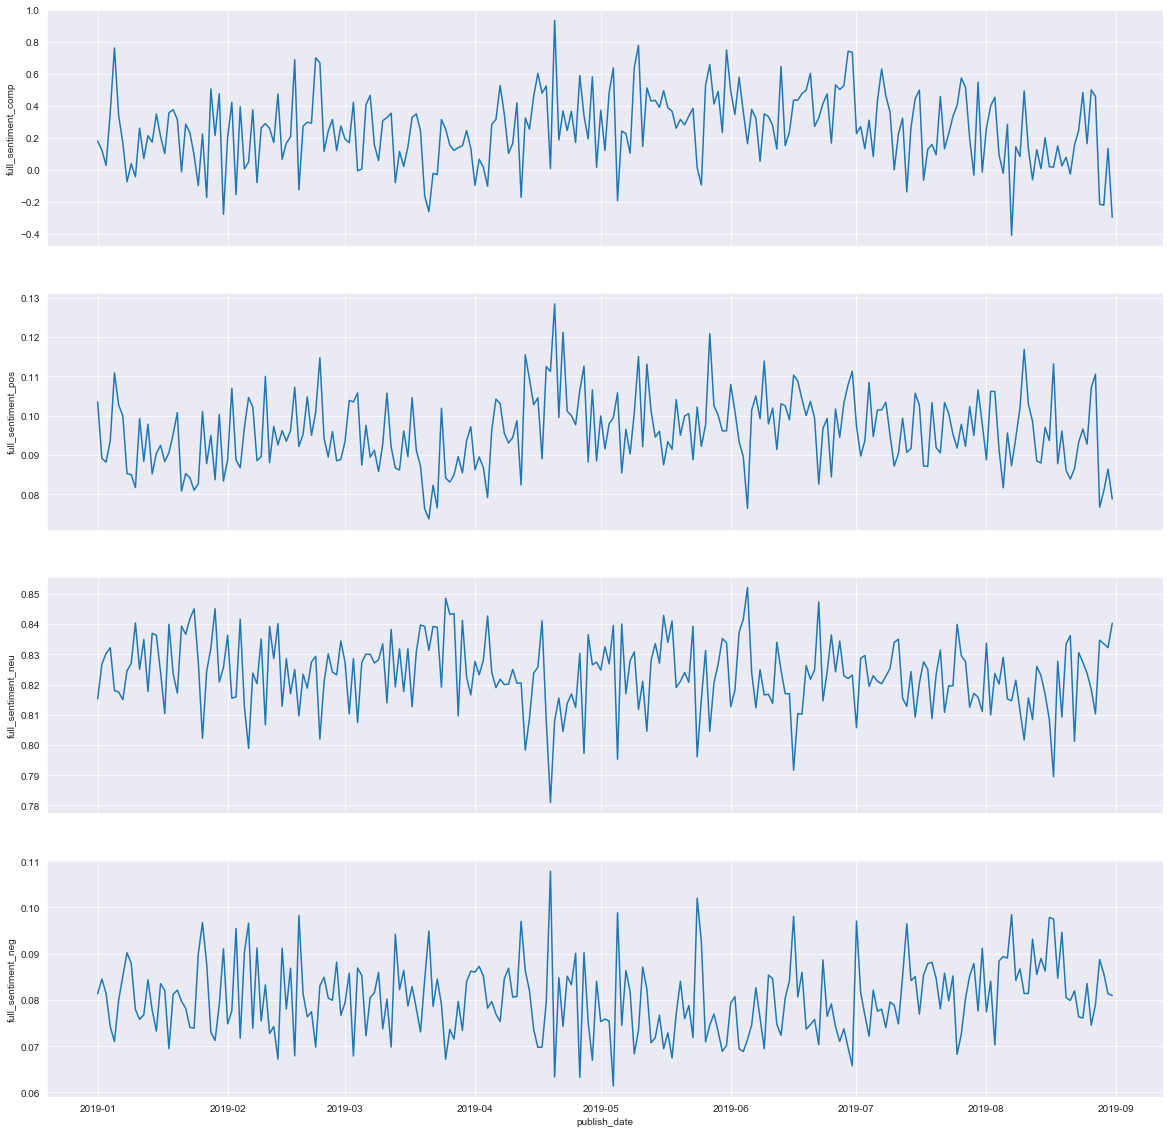

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20,20))
plot_sentiment('full', 'comp', 'D', ax=axes[0], start=start_date )
plot_sentiment('full', 'pos', 'D', ax=axes[1], start=start_date )
plot_sentiment('full', 'neu', 'D', ax=axes[2], start=start_date )
plot_sentiment('full', 'neg', 'D', ax=axes[3], start=start_date )